# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [140]:
#Load basic python libraries
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt


In [224]:
#Import models and data related python packages
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS, OLSResults
from statsmodels.stats.outliers_influence import variance_inflation_factor

### **Let us load the data**

In [142]:
#Mount Google Drive
from google.colab import drive
drive.mount('//content//MyDrive')

Drive already mounted at //content//MyDrive; to attempt to forcibly remount, call drive.mount("//content//MyDrive", force_remount=True).


In [143]:
#Read the used cars data and make a copy
used_cars_data = pd.read_csv("//content//MyDrive//My Drive//Colab Notebooks//ADSP//used_cars.csv")
used_cars_data_org = used_cars_data.copy()

## Data Overview

- Observations
- Sanity checks

In [144]:
#Get information on the dataset
used_cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


<font color='blue'>

* Dataset has 14 columns
* 9 columns are numerical, while 5 are categorical
* There are total of 7253 datapoints with missing data for Mileage, Engine, Power, Seats, Price & New_price
</font>

In [145]:
#Get a random sample from the data
used_cars_data.sample(n=5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
4924,4924,Mercedes-Benz M-Class ML 250 CDI,Jaipur,2014,66000,Diesel,Automatic,First,15.26,2143.0,203.20,5.0,NaN,30.00
3681,3681,Volkswagen CrossPolo 1.5 TDI,Hyderabad,2015,80768,Diesel,Manual,First,20.14,1498.0,88.73,5.0,NaN,5.70
185,185,Renault Lodgy 110PS RxZ 8 Seater,Mumbai,2015,25000,Diesel,Manual,First,19.98,1461.0,108.50,8.0,NaN,6.75
4522,4522,Ford Fiesta Classic 1.4 Duratorq CLXI,Hyderabad,2011,143143,Diesel,Manual,First,17.80,1399.0,67.00,5.0,NaN,2.10
4020,4020,Maruti Swift VDI BSIV,Kolkata,2013,115195,Diesel,Manual,First,25.20,1248.0,74.00,5.0,NaN,3.85


## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [146]:
#Get summary statistics for numerical variables
used_cars_data.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.000,3626.00,5439.0000,7252.00
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


<font color='blue'>

*   Average kilometers driven is ~58700 kms, with as low as 171 km and going upto 6.5M km (outlier)
*   Average mileage is 18 with a minimum of 0, perhaps indicating unused car and maximum of 33.54
*   Average engine volume is 1616CC, with a minimum of 72 CC and maximum of 5998 CC
*   Average power is 112 with a minimum of 34.2 and a maximum of 616
*   Average number of seats is 5, with a minimum of 2 and maximum of 10 seats
*   Average price for the used cars is 9.5L, with a min price of Rs. 44,000 and 160 Lakhs
</font>

In [147]:
#Get summary statistics for categorical variables
categorical_summary=used_cars_data.describe(exclude=np.number).T
categorical_summary['Percent']=categorical_summary['freq']/7253
categorical_summary

,count,unique,top,freq,Percent
Name,7253,2041,Mahindra XUV500 W8 2WD,55,0.007583
Location,7253,11,Mumbai,949,0.130842
Fuel_Type,7253,5,Diesel,3852,0.531091
Transmission,7253,2,Manual,5204,0.717496
Owner_Type,7253,4,First,5952,0.820626


In [148]:
#Different types of fuel used
used_cars_data['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [149]:
#Different types of engine
used_cars_data['Engine'].unique()

array([ 998., 1582., 1199., 1248., 1968.,  814., 1461., 2755., 1598.,
       1462., 1497., 2179., 2477., 1498., 2143., 1995., 1984., 1197.,
       2494., 1798., 2696., 2698., 1061., 1198., 2987.,  796.,  624.,
       1999., 1991., 2694., 1120., 2498.,  799., 2393., 1399., 1796.,
       2148., 1396., 1950., 4806., 1998., 1086., 1193., 2982., 1493.,
       2967., 2993., 1196., 1799., 2497., 2354., 1373., 2996., 1591.,
       2894., 5461., 1595.,  936., 1997.,   nan, 1896., 1390., 1364.,
       2199.,  993.,  999., 1405., 2956., 1794.,  995., 2496., 1599.,
       2400., 1495., 2523.,  793., 4134., 1596., 1395., 2953., 1586.,
       2362., 1496., 1368., 1298., 1956., 1299., 3498., 2835., 1150.,
       3198., 1343., 1499., 1186., 1590., 2609., 2499., 2446., 1978.,
       2360., 3436., 2198., 4367., 2706., 1422., 2979., 1969., 1489.,
       2489., 1242., 1388., 1172., 2495., 1194., 3200., 1781., 1341.,
       2773., 3597., 1985., 2147., 1047., 2999., 2995., 2997., 1948.,
       2359., 4395.,

<font color='blue'>

*   There are 2041 unique car brand and model names. Mahindra XUV500 is the most owned car in the dataset
*   Owners are based in 11 unique locations, with most owners (13%) based out of Mumbai
*  5 types of fuels are used - CNG, Diesel, Petrol, LPG & Electric, out of which diesel is the most commonly used fuel. 53% of owners have diesel based cars
* Majority of the cars, around 71% have manual transmission
* 82% of the cars are owned for the first time
</font>

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perform the log_transformation(if needed) and write down your observations?

In [150]:
#Function to plot box plot and histogram together
def boxplot_hist(data, figsize=(10,5)):
 fig, (ax1, ax2)= plt.subplots(nrows=2, ncols=1, sharex=True, height_ratios=(0.25,0.75),)
 sbn.boxplot(x=data, color='y', ax=ax1)
 sbn.histplot(data=data, color='r', ax=ax2, kde=True)
 #ax2.vlines(x=np.median(data), ymin=0,ymax=100,colors='g')

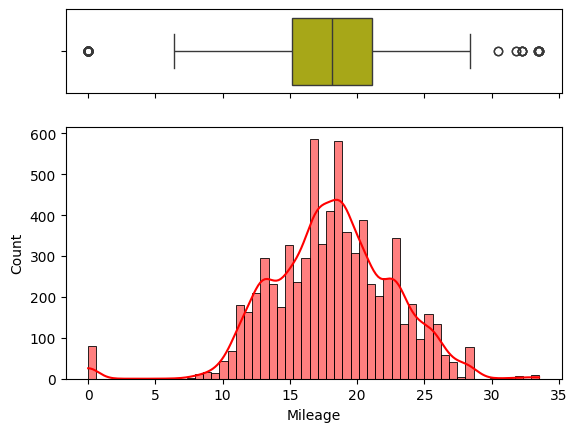

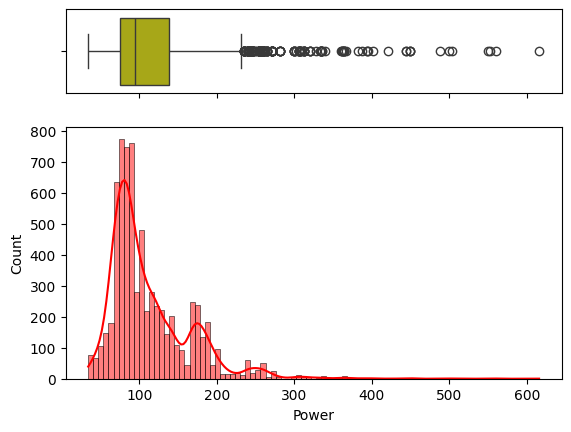

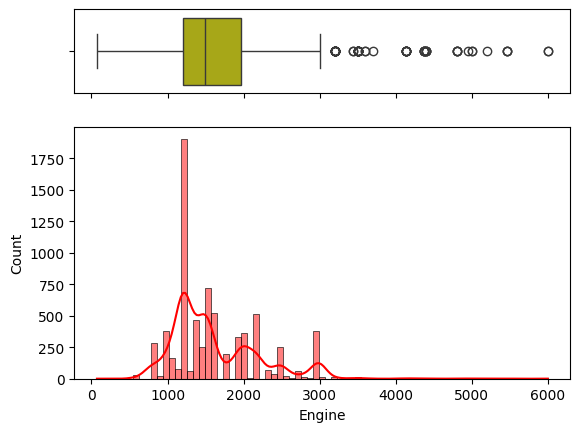

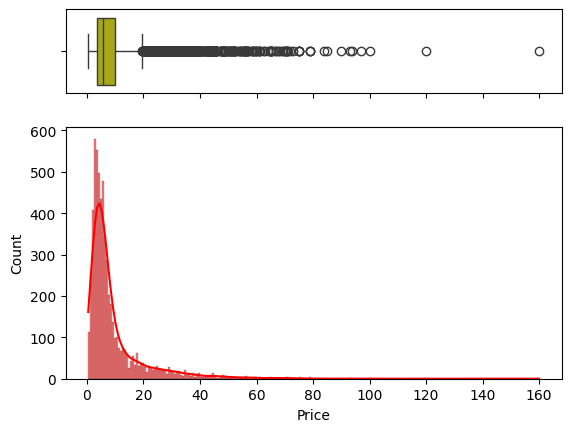

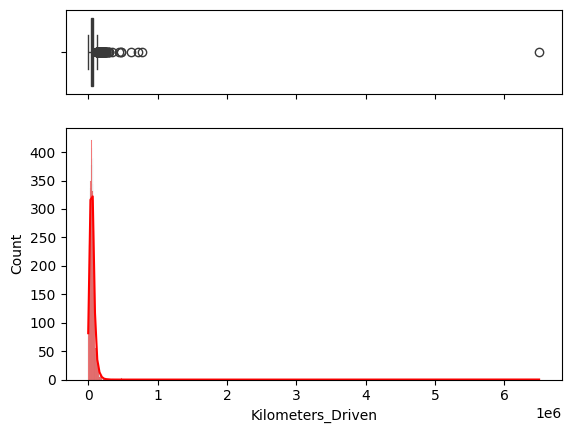

In [151]:
#Plot boxplot and histograms for numerical variables
boxplot_hist(used_cars_data['Mileage'])
boxplot_hist(used_cars_data['Power'])
boxplot_hist(used_cars_data['Engine'])
boxplot_hist(used_cars_data['Price'])
boxplot_hist(used_cars_data['Kilometers_Driven'])

<font color='blue'>

Univariate Observations: Numerical factors
*   Mileage: With the exception of very few outliers, mileage shows an approximately normal distribution
*   Power: The distribution is left skewed and there are many outliers beyond the 75% quartile
*   Engine: Its hard to put a continous distribution on the engine
*   Price: Except for a few higher prices, prices exhibit left skewed distribution
*  Kilometers : Similar to price, except for few cars that have been driven long kms, kilometers driven exhibit left skwed distribution
</font>

<font color='blue'>
*   Clearly, there is an extreme outlier in the driven kilometers data. Lets replot the driven kilometers after removing the outlier
</font>


In [152]:
used_cars_data_org[used_cars_data_org['Kilometers_Driven'] == used_cars_data_org['Kilometers_Driven'].max()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,NaN,65.0


In [153]:
#Replace the outlier for kilometers driven by NaN
used_cars_data.loc[2328,'Kilometers_Driven']=np.NaN


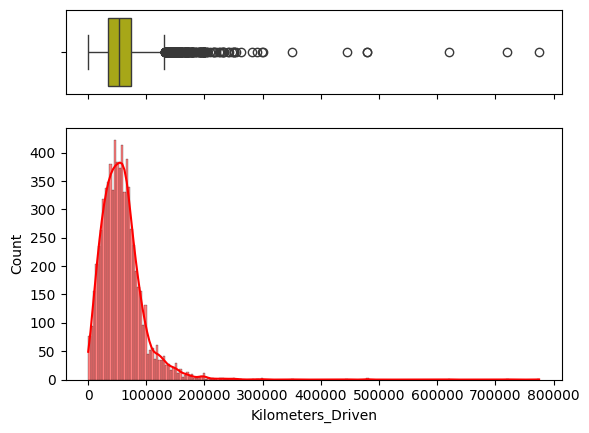

In [154]:
boxplot_hist(used_cars_data['Kilometers_Driven'])

In [155]:
#Function to plot count plot for categorical variables
def custom_countplot(idata, col, figsize=(10,5)):

  plt.figure(figsize=figsize)
  sbn.countplot(data=idata, x=col, order=idata[col].value_counts().index)

  #Get the count and % of each unique value in the data
  count_unique= idata[col].value_counts()
  percent_unique=idata[col].value_counts(normalize=True)

  #annote % on top of the countplot
  for i in np.arange(0, len(count_unique)):
    plt.annotate(text=str(round(percent_unique[i]*100,2)) + "%", xy=(i,count_unique[i]+10))



<ipython-input-155-c9c238ce1928>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(text=str(round(percent_unique[i]*100,2)) + "%", xy=(i,count_unique[i]+10))
<ipython-input-155-c9c238ce1928>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(text=str(round(percent_unique[i]*100,2)) + "%", xy=(i,count_unique[i]+10))
<ipython-input-155-c9c238ce1928>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotat

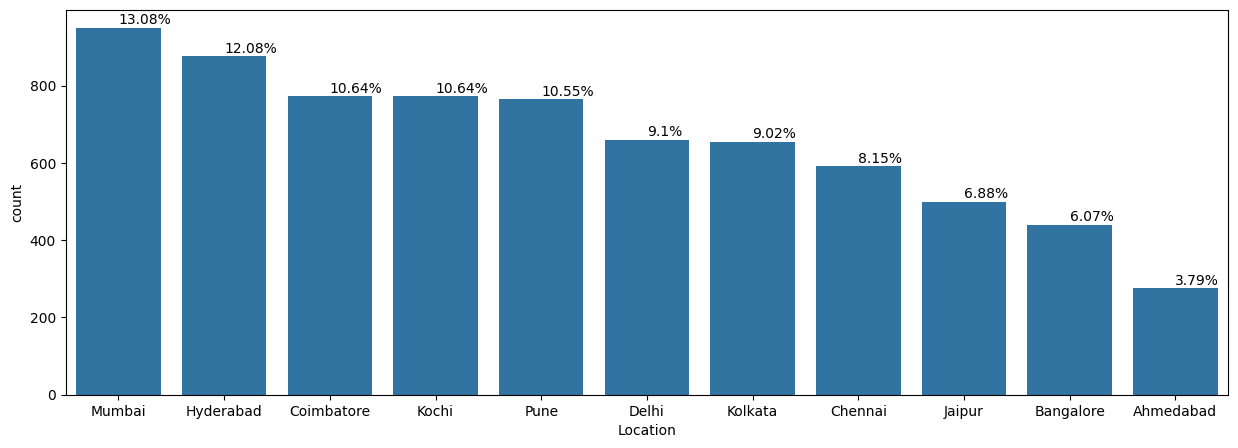

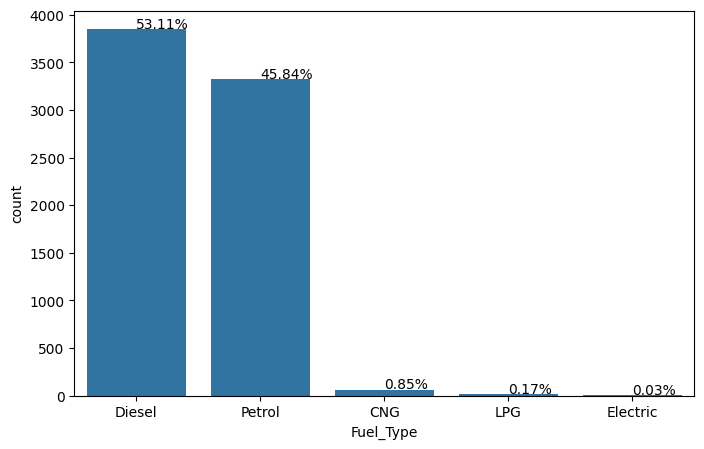

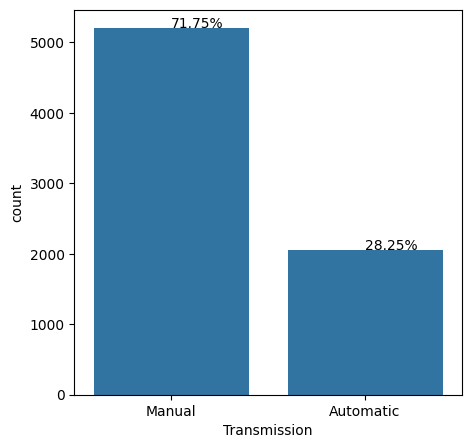

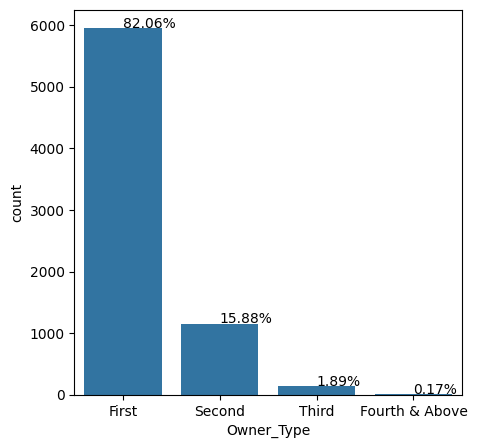

In [156]:
#Plot countplots for categorical variables
custom_countplot(used_cars_data, 'Location', figsize=(15,5))
custom_countplot(used_cars_data, 'Fuel_Type', figsize=(8,5))
custom_countplot(used_cars_data, 'Transmission', figsize=(5,5))
custom_countplot(used_cars_data, 'Owner_Type', figsize=(5,5))

<font color='blue'>

Univariate Observations: Categorical factors
* Location: Most of the owners are based in Mumbai and Hyderabad (13% and
 12%, respectively), following by Coimbatore, Kochi and Pune (~10%)
* Fuel: Majority of the cars use diesel or petrol. Less than 1% of the cars use CNG, LPG or electricity
* Transimission: 71% of the cars use manual transmissio, while rest have automatic transmission
* Owner Type: Most of the owners (82%) are the first owners of the vehicle. ~16% are the second owners. Only around 2% owners are third or above owners.
<font>

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

<Axes: xlabel='Mileage', ylabel='Price'>

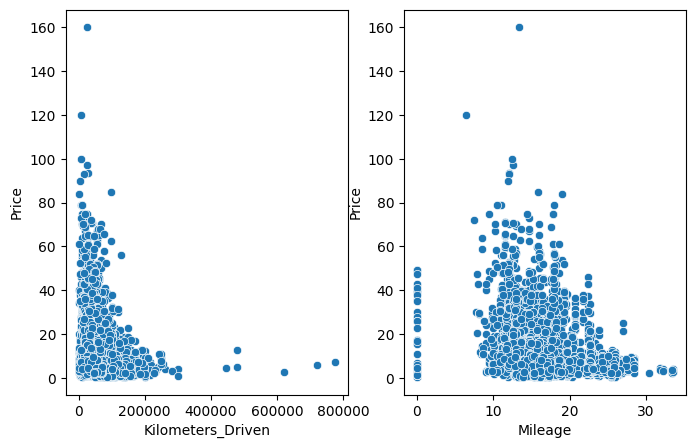

In [157]:
#Plot Kilometers_drive and mileage vs price to see if any needs log transformation
fig, (ax1, ax2)=plt.subplots(nrows=1, ncols=2,figsize=(8,5))
sbn.scatterplot(data=used_cars_data, x='Kilometers_Driven', y='Price', ax=ax1)
sbn.scatterplot(data=used_cars_data, x='Mileage', y='Price', ax=ax2)

<font color='blue'>
Since we see price values are concentrated w.r.t Kilometers_Driven and not exactly showing any type of linear structure, we will use log(Kms) as the predictor variable.
</font>`

In [158]:
log_kms=np.log(used_cars_data['Kilometers_Driven'])
log_mileage= np.log(used_cars_data['Mileage'])


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Year', ylabel='Price'>

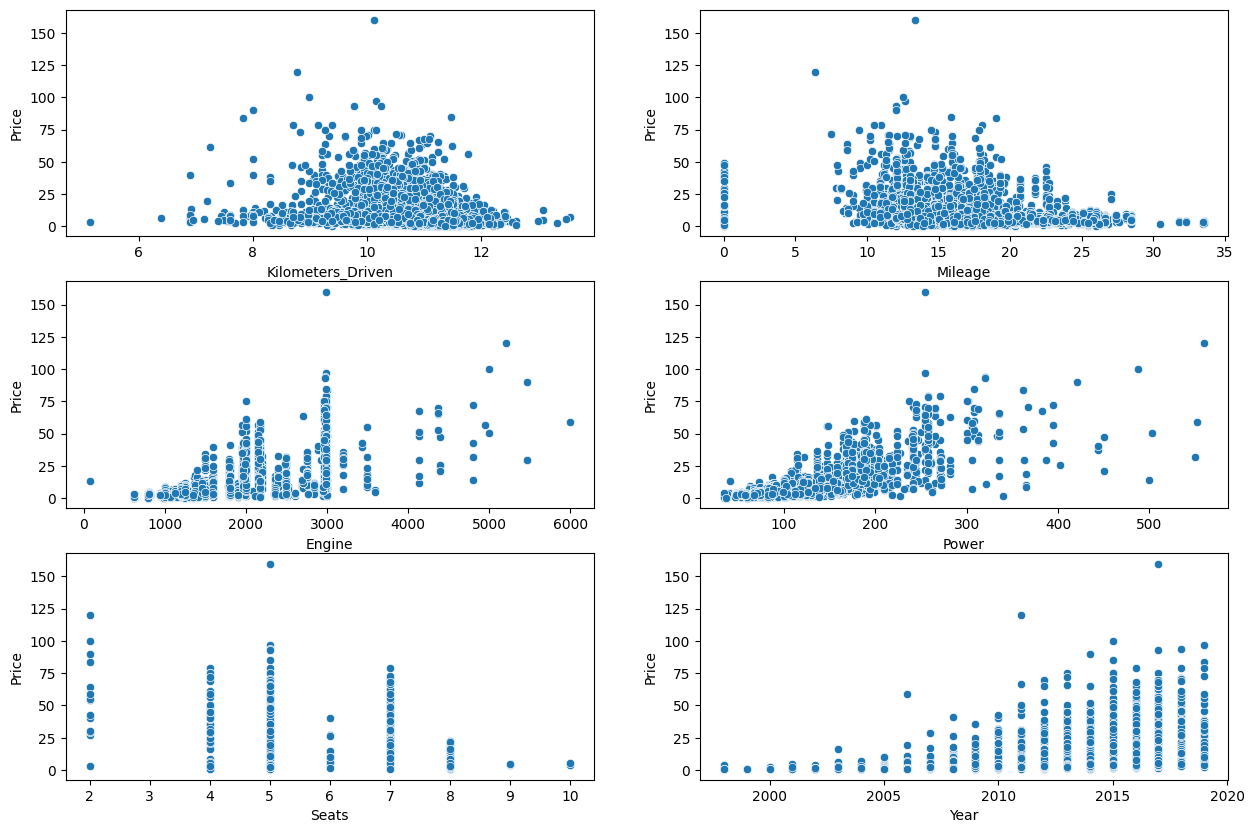

In [159]:
#Plot scatter plots for independent features w/ target variables
fig, axs=plt.subplots(nrows=3, ncols=2, figsize=(15,10))
sbn.scatterplot(x=log_kms,y=used_cars_data['Price'], ax=axs[0,0])
#sbn.scatterplot(x=log_mileage,y=used_cars_data['Price'], ax=axs[0,1])
sbn.scatterplot(data=used_cars_data, x='Mileage',y='Price', ax=axs[0,1])
sbn.scatterplot(data=used_cars_data, x='Engine',y='Price', ax=axs[1,0])
sbn.scatterplot(data=used_cars_data, x='Power',y='Price', ax=axs[1,1])
sbn.scatterplot(data=used_cars_data,x='Seats',y='Price', ax=axs[2,0])
sbn.scatterplot(data=used_cars_data, x='Year',y='Price', ax=axs[2,1])

In [160]:
used_cars_data.corr(numeric_only=True)

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
S.No.,1.000000,0.005573,-0.002644,0.019104,-0.014607,-0.021667,-0.006587,-0.065104,-0.020275
Year,0.005573,1.000000,-0.449479,0.322463,-0.054693,0.013432,0.007871,-0.058798,0.305327
Kilometers_Driven,-0.002644,-0.449479,1.000000,-0.144359,0.158937,0.002642,0.214072,-0.008221,-0.168299
Mileage,0.019104,0.322463,-0.144359,1.000000,-0.593569,-0.531771,-0.313011,-0.378327,-0.306593
Engine,-0.014607,-0.054693,0.158937,-0.593569,1.000000,0.859771,0.402715,0.735981,0.658354
Power,-0.021667,0.013432,0.002642,-0.531771,0.859771,1.000000,0.095905,0.877708,0.772566
Seats,-0.006587,0.007871,0.214072,-0.313011,0.402715,0.095905,1.000000,-0.019459,0.053199
New_price,-0.065104,-0.058798,-0.008221,-0.378327,0.735981,0.877708,-0.019459,1.000000,0.871847
Price,-0.020275,0.305327,-0.168299,-0.306593,0.658354,0.772566,0.053199,0.871847,1.000000


<Axes: >

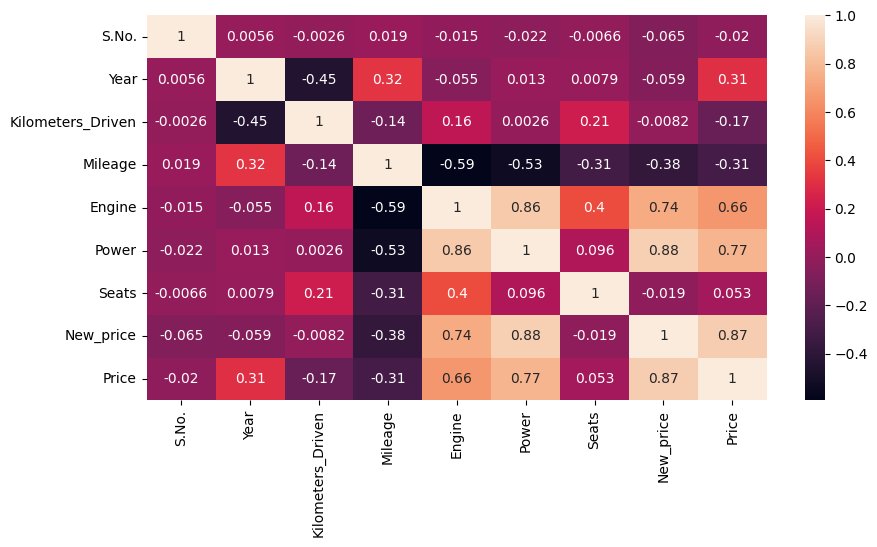

In [161]:
plt.figure(figsize=(10,5))
sbn.heatmap(used_cars_data.corr(numeric_only=True), annot=True)

*   Target variable price shows high empirical correlation with engine and power. Better engine and power has higher price, which is reasonable
*   Similarly, price is negatively correlated with mileage and kilometers driven. More the mileage, price is lower
* Between independent factors, there is high reverse correlation b/w mileage and power, mileage and engine.
* There is 86% correlation between engine and power, indicating multi-colinearity



<Axes: xlabel='Transmission', ylabel='Price'>

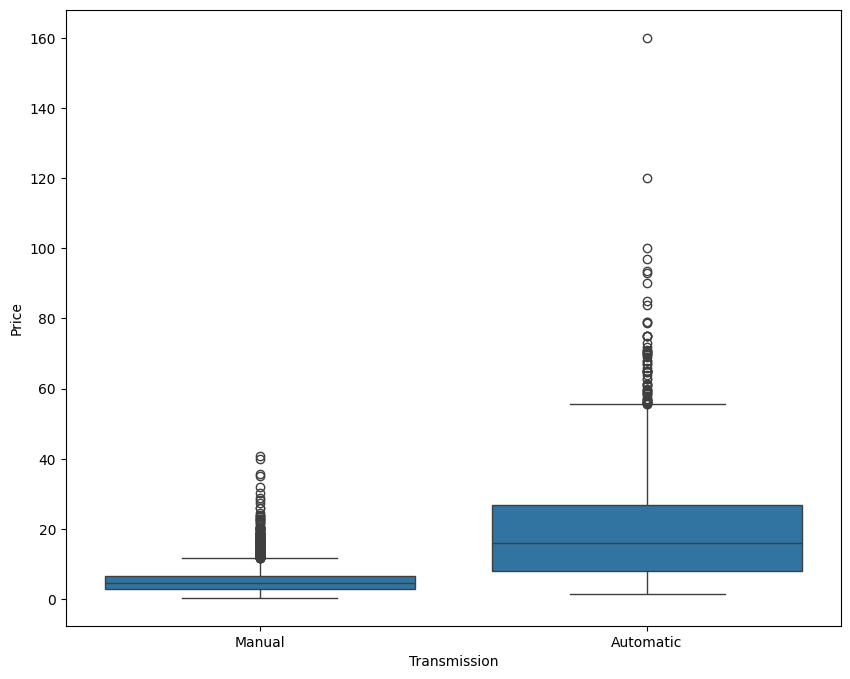

In [162]:
#Plot transmission type with price
plt.figure(figsize=(10,8))
sbn.boxplot(data=used_cars_data, x='Transmission', y='Price')

<Axes: xlabel='Fuel_Type', ylabel='Price'>

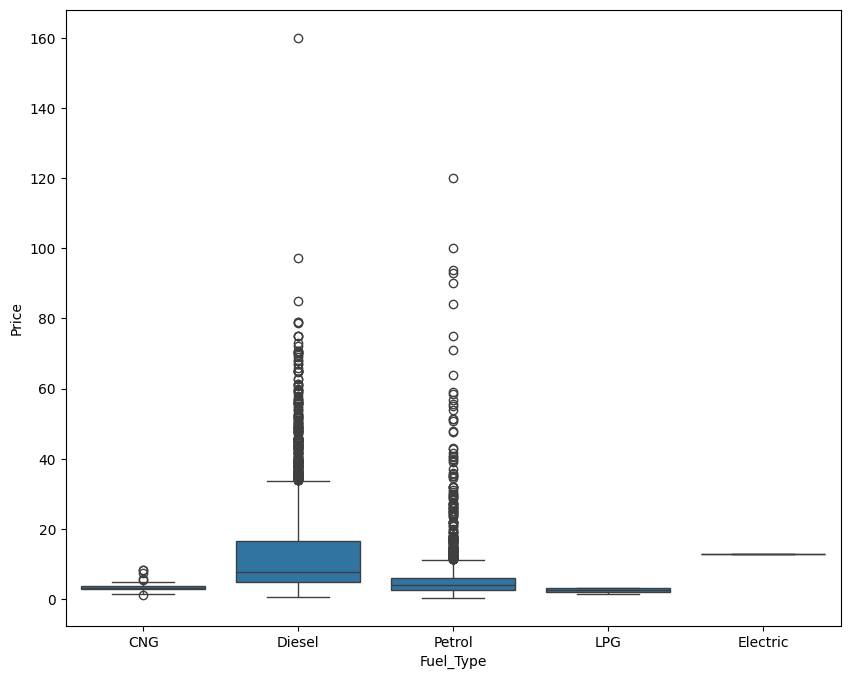

In [163]:
#Plot fuel type with price
plt.figure(figsize=(10,8))
sbn.boxplot(data=used_cars_data, x='Fuel_Type', y='Price')

<Axes: xlabel='Location', ylabel='Price'>

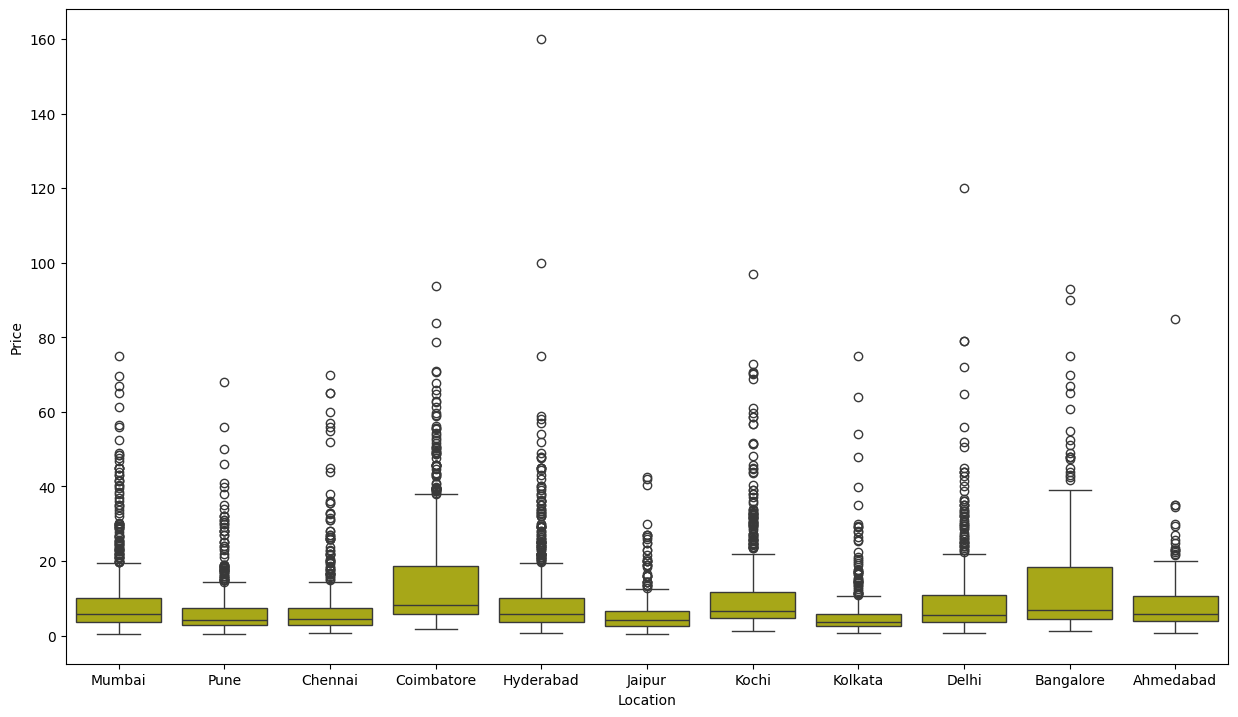

In [164]:
#Plot box plot for location vs. price
plt.figure(figsize=(15,8.5))
sbn.boxplot(data=used_cars_data,x='Location', y='Price', color='y', dodge=True)

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column?

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [165]:
#Get unique names
unique_names=used_cars_data['Name'].unique()

In [166]:
#Check sample names
unique_names[0:10]

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', 'Maruti Ertiga VDI',
       'Audi A4 New 2.0 TDI Multitronic',
       'Hyundai EON LPG Era Plus Option', 'Nissan Micra Diesel XV',
       'Toyota Innova Crysta 2.8 GX AT 8S',
       'Volkswagen Vento Diesel Comfortline',
       'Tata Indica Vista Quadrajet LS'], dtype=object)

In [167]:
#Extract the brand names
brand_names=pd.Series([car_name.split()[0].lower() for car_name in used_cars_data['Name']])

In [168]:
#Get the unique brand names
brand_names.unique()

array(['maruti', 'hyundai', 'honda', 'audi', 'nissan', 'toyota',
       'volkswagen', 'tata', 'land', 'mitsubishi', 'renault',
       'mercedes-benz', 'bmw', 'mahindra', 'ford', 'porsche', 'datsun',
       'jaguar', 'volvo', 'chevrolet', 'skoda', 'mini', 'fiat', 'jeep',
       'smart', 'ambassador', 'isuzu', 'force', 'bentley', 'lamborghini',
       'hindustan', 'opelcorsa'], dtype=object)

In [169]:
#Add a new column for brand
used_cars_data['Brand']=brand_names

In [170]:
#Get proportions of various brands
used_cars_data['Brand'].value_counts(normalize=True)


,proportion
Brand,
maruti,0.199090
hyundai,0.184751
honda,0.102440
toyota,0.069902
mercedes-benz,0.052392
volkswagen,0.051565
ford,0.048394
mahindra,0.045636
bmw,0.043017


In [171]:
#Create a pivot table for price by brand
price_by_brand=pd.pivot_table(data=used_cars_data, values='Price', index='Brand', aggfunc=['mean','max'])
price_by_brand.columns=['AvgPrice','MaxPrice']
price_by_brand.sort_values(by=['AvgPrice','MaxPrice'], ascending=False)


,AvgPrice,MaxPrice
Brand,,
lamborghini,120.000000,120.00
bentley,59.000000,59.00
porsche,48.348333,75.00
land,39.259500,160.00
jaguar,37.632250,100.00
mini,26.896923,39.75
mercedes-benz,26.809874,90.00
audi,25.537712,72.94
bmw,25.243146,93.67


#### Price by Brand
*   After extracting the brand names from the car names, it is obsevred that on an average, Lamborghini, Bentley, Porsche, Land Rover, Jaguar are the highest priced used cars
*   Additionally, some of the highest priced brands are Land Rover, Lamborghini, Jaguar, BMW and mercedes



In [172]:
#Convert Year column into the age of the car using base year of 2019 (max year)
used_cars_data['Age']=2019-used_cars_data['Year']

In [173]:
#Drop columns
used_cars_data.drop(columns=['Year','Name'], inplace=True)

### **Missing value treatment**

In [174]:
#Missing values- Mileage, power, engine, number of seats are 4 features with missing values
#There are only 2 values missing for mileage, lets try to plot mileage by fuel type to see if there is any pattern
mileage_eng=pd.pivot_table(data=used_cars_data,values=['Mileage','Engine', 'Power'], columns='Fuel_Type', aggfunc='median')
mileage_eng


Fuel_Type,CNG,Diesel,Electric,LPG,Petrol
Engine,998.0,1598.00,935.0,1061.0,1198.0
Mileage,26.6,19.01,NaN,17.3,17.8
Power,58.2,108.45,57.0,58.2,83.1


Text(0, 0.5, 'Mileage')

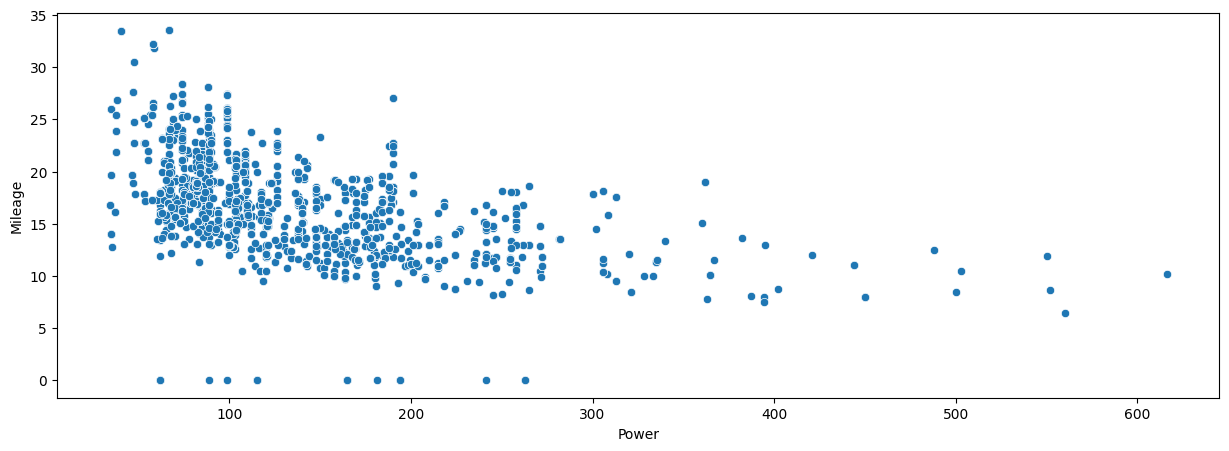

In [175]:
plt.figure(figsize=(15,5))
#sbn.scatterplot(y=np.array(mileage_eng.loc['Mileage',:]), x=np.array(mileage_eng.loc['Engine',:]))
sbn.scatterplot(data=used_cars_data, y='Mileage', x='Power')
plt.xlabel('Power')
plt.ylabel('Mileage')

In [176]:
#Mileage by transmission
pd.pivot_table(data=used_cars_data,values=['Mileage'], columns=['Transmission'], index='Brand', aggfunc='median')

Mileage        
Transmission  Automatic  Manual
Brand                          
ambassador          NaN  12.800
audi             15.730  17.320
bentley           9.400     NaN
bmw              17.050     NaN
chevrolet        14.810  18.200
datsun              NaN  20.630
fiat             19.000  17.800
force               NaN  17.000
ford             11.400  20.000
hindustan           NaN  14.100
honda            16.500  18.000
hyundai          17.010  19.100
isuzu            13.800  12.400
jaguar           14.740     NaN
jeep             16.000  17.100
lamborghini       6.400     NaN
land             12.630   0.000
mahindra         12.895  15.100
maruti           22.500  21.100
mercedes-benz    14.210  15.800
mini             20.700  13.800
mitsubishi       13.500  11.030
nissan           17.970  19.690
opelcorsa           NaN  14.200
porsche          15.150   9.000
renault          19.600  19.925
skoda            14.840  17.670
smart             0.000     NaN
tata             21.900  19.400
toyota           12.550  12.990
volkswagen       17.210  19.055
volvo            13.500  11.100

In [177]:
#Look at the data with missing Mileage
used_cars_data[used_cars_data['Mileage'].isna()]

,S.No.,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Brand,Age
4446,4446,Chennai,50000.0,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00,mahindra,3
4904,4904,Mumbai,44000.0,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75,toyota,8


In [178]:
#Looking at Mahindra cars with automatic transmission
used_cars_data[(used_cars_data['Brand']=='mahindra') & (used_cars_data['Transmission']=='Automatic')].sort_values(by='Engine')

,S.No.,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Brand,Age
4446,4446,Chennai,50000.0,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00,mahindra,3
7006,7006,Kochi,31861.0,Diesel,Automatic,First,18.49,1493.0,100.0,7.0,NaN,NaN,mahindra,2
2698,2698,Hyderabad,30000.0,Diesel,Automatic,First,18.49,1493.0,100.0,7.0,NaN,8.20,mahindra,2
1687,1687,Kochi,47357.0,Diesel,Automatic,First,18.49,1493.0,100.0,7.0,NaN,8.37,mahindra,2
3878,3878,Kochi,25948.0,Diesel,Automatic,First,16.00,2179.0,140.0,7.0,NaN,16.46,mahindra,1
3407,3407,Coimbatore,82739.0,Diesel,Automatic,First,16.00,2179.0,140.0,7.0,NaN,16.77,mahindra,1
4848,4848,Hyderabad,86000.0,Diesel,Automatic,First,11.79,2179.0,120.0,8.0,NaN,8.00,mahindra,6
2389,2389,Coimbatore,24500.0,Diesel,Automatic,First,16.00,2179.0,140.0,7.0,NaN,16.52,mahindra,1
5209,5209,Hyderabad,80999.0,Diesel,Automatic,First,16.00,2179.0,140.0,7.0,NaN,14.40,mahindra,3
4203,4203,Mumbai,50000.0,Diesel,Automatic,First,11.79,2179.0,120.0,8.0,NaN,6.00,mahindra,8


In [179]:
#First missing value for Mileage is for a Mahindra 2016 car with automatic transmission. Engine for the car is at the lowest value of 72.0. Since the engine & mileage have reasonable negative correlation,
#the missing mileage can be filled with highest mileage in Mahindra cars with automatic transmission
used_cars_data.loc[4446,'Mileage'] =18.49

In [180]:
#Second missing value is in a Toyota car with engine as 1798
#For this, we can choose to fill with median mileage for toyota cars with automatic transmission
used_cars_data.loc[4904,'Mileage']=12.55

In [181]:
#Confirm there are no more missing mileage values
used_cars_data['Mileage'][used_cars_data['Mileage'].isna()]

,Mileage


<Axes: xlabel='Engine', ylabel='Power'>

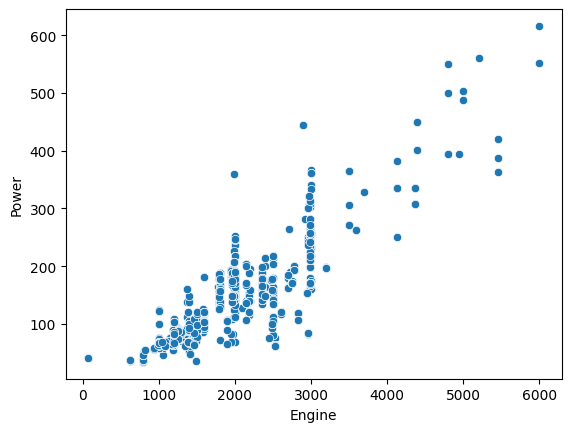

In [182]:
#For backfilling missing engine and power, high correlation between engine and power can be used
sbn.scatterplot(data=used_cars_data, x='Engine',y='Power')

Though an increasing linear relationship can be seen from the scatter plot of Engine and Power, when the engine is ~2000 or engine is ~3000, there is lot of variation in the power.

In [183]:
#Checking if besides power, engine has correlation with any other features
pd.pivot_table(data=used_cars_data,values=['Engine'], columns=['Transmission'],index='Brand', aggfunc='median')


Engine        
Transmission  Automatic  Manual
Brand                          
ambassador          NaN  1489.0
audi             1968.0  1968.0
bentley          5998.0     NaN
bmw              1995.0     NaN
chevrolet        1998.0  1199.0
datsun              NaN  1198.0
fiat             1368.0  1248.0
force               NaN  2200.0
ford             2953.0  1399.0
hindustan           NaN  1995.0
honda            1497.0  1497.0
hyundai          1582.0  1197.0
isuzu            2999.0  2499.0
jaguar           2179.0     NaN
jeep             1368.0  1956.0
lamborghini      5204.0     NaN
land             2179.0     NaN
mahindra         2179.0  2179.0
maruti            998.0  1248.0
mercedes-benz    2143.0  2148.0
mini             1598.0  1998.0
mitsubishi       2477.0  2835.0
nissan           1498.0  1461.0
opelcorsa           NaN  1389.0
porsche          2967.0  3436.0
renault          1461.0  1461.0
skoda            1798.0  1598.0
smart             799.0     NaN
tata              624.0  1248.0
toyota           2755.0  2494.0
volkswagen       1598.0  1498.0
volvo            1984.0  2400.0

In [184]:
missing_engine_data = used_cars_data[used_cars_data['Power'].isna()]

In [185]:
missing_engine_data

,S.No.,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Brand,Age
76,76,Jaipur,111111.0,Diesel,Manual,First,17.80,1399.0,NaN,5.0,NaN,2.00,ford,11
79,79,Hyderabad,87591.0,Petrol,Manual,First,0.00,1086.0,NaN,5.0,NaN,1.30,hyundai,14
89,89,Hyderabad,73745.0,Petrol,Manual,First,17.00,1086.0,NaN,5.0,NaN,2.10,hyundai,12
120,120,Mumbai,102000.0,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,NaN,0.85,hyundai,14
143,143,Kochi,80759.0,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,NaN,1.67,hyundai,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,6896,Hyderabad,86000.0,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,NaN,toyota,6
6902,6902,Kochi,59311.0,Petrol,Manual,First,18.30,NaN,NaN,NaN,NaN,NaN,toyota,7
6947,6947,Delhi,77800.0,Petrol,Manual,First,18.30,1197.0,NaN,5.0,NaN,NaN,toyota,7
7092,7092,Coimbatore,64168.0,Petrol,Automatic,First,17.00,1086.0,NaN,5.0,NaN,NaN,hyundai,12


In [186]:
missing_engine_data.head(), missing_engine_data.shape

(     S.No.   Location  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
 76      76     Jaipur           111111.0    Diesel       Manual      First   
 79      79  Hyderabad            87591.0    Petrol       Manual      First   
 89      89  Hyderabad            73745.0    Petrol       Manual      First   
 120    120     Mumbai           102000.0    Petrol       Manual     Second   
 143    143      Kochi            80759.0    Petrol       Manual      Third   
 
      Mileage  Engine  Power  Seats  New_price  Price    Brand  Age  
 76      17.8  1399.0    NaN    5.0        NaN   2.00     ford   11  
 79       0.0  1086.0    NaN    5.0        NaN   1.30  hyundai   14  
 89      17.0  1086.0    NaN    5.0        NaN   2.10  hyundai   12  
 120     17.0  1086.0    NaN    5.0        NaN   0.85  hyundai   14  
 143     17.0  1086.0    NaN    5.0        NaN   1.67  hyundai   11  ,
 (175, 14))

<font color='blue'>
*   Most of the data points with missing engine, also have missing power. So despite a high correlation between power and engine, power cannot be used to backfill the missing engine data
* Perhaps, we can leverage mileage to backfill with power and engine

</font>




In [187]:
#Get engine and power values by Mileage ranges
mileage_data1=used_cars_data[(used_cars_data['Mileage'] < 10)]
mileage_data1['Power'].median(), mileage_data1['Engine'].median()

(193.1, 2179.0)

In [188]:
#Get engine and power values by Mileage ranges
mileage_data2=used_cars_data[(used_cars_data['Mileage'] >= 10) & (used_cars_data['Mileage'] < 15)]
mileage_data2['Power'].median(), mileage_data2['Engine'].median()


(157.8, 2354.0)

In [189]:
#Get engine and power values by Mileage ranges
mileage_data3=used_cars_data[(used_cars_data['Mileage'] >= 15)]
mileage_data3['Power'].median(), mileage_data3['Engine'].median()


(86.8, 1248.0)

We will use the median power and median engine to backfill the missing power and engine values based on the Mileage value. The reason being, it is the only feature that shows some correlation with engine/power values

In [190]:
#Backfil missing engine by the range of mileage values
used_cars_data.loc[(used_cars_data['Engine'].isna()) & (used_cars_data['Mileage'] <10),'Engine']=2179.0
used_cars_data.loc[(used_cars_data['Engine'].isna()) & (used_cars_data['Mileage'] >=10) & (used_cars_data['Mileage'] < 15),'Engine']=2179.0
used_cars_data.loc[(used_cars_data['Engine'].isna()) & (used_cars_data['Mileage'] >=15),'Engine']=1248.0


In [191]:
#Backfil missing engine by the range of mileage values
used_cars_data.loc[(used_cars_data['Power'].isna()) & (used_cars_data['Mileage'] <10),'Power']=193.1
used_cars_data.loc[(used_cars_data['Power'].isna()) & (used_cars_data['Mileage'] >=10) & (used_cars_data['Mileage'] < 15),'Power']=157.8
used_cars_data.loc[(used_cars_data['Power'].isna()) & (used_cars_data['Mileage'] >=15),'Power']=86.8

In [192]:
used_cars_data[used_cars_data['Kilometers_Driven'].isna()]

,S.No.,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Brand,Age
2328,2328,Chennai,NaN,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,NaN,65.0,bmw,2


In [193]:
#Check remaining missing values
used_cars_data.isna().sum()

,0
S.No.,0
Location,0
Kilometers_Driven,1
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0
Seats,53


In [194]:
#Remove the row with missing kilmeters as it is completely independent feature
used_cars_data.drop(index=2328, inplace=True)


In [195]:
#Reset index
used_cars_data.reset_index()

,index,S.No.,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Brand,Age
0,0,0,Mumbai,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,maruti,9
1,1,1,Pune,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,hyundai,4
2,2,2,Chennai,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,honda,8
3,3,3,Chennai,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,maruti,7
4,4,4,Coimbatore,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,audi,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7247,7248,7248,Hyderabad,89411.0,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN,volkswagen,8
7248,7249,7249,Mumbai,59000.0,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN,volkswagen,4
7249,7250,7250,Kolkata,28000.0,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN,nissan,7
7250,7251,7251,Pune,52262.0,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN,volkswagen,6


In [196]:
#since car seats has very low correlation with price, missing seats can be filled with the mean/median value of 5
used_cars_data.loc[used_cars_data['Seats'].isna(),'Seats']=5

In [197]:
used_cars_data.dropna(subset=['Price'], inplace=True)

In [198]:
#Reset row index after removing NA price
used_cars_data.reset_index()

,index,S.No.,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Brand,Age
0,0,0,Mumbai,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,maruti,9
1,1,1,Pune,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,hyundai,4
2,2,2,Chennai,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,honda,8
3,3,3,Chennai,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,maruti,7
4,4,4,Coimbatore,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,audi,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,6014,6014,Delhi,27365.0,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88,4.75,maruti,5
6014,6015,6015,Jaipur,100000.0,Diesel,Manual,First,24.40,1120.0,71.00,5.0,NaN,4.00,hyundai,4
6015,6016,6016,Jaipur,55000.0,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,NaN,2.90,mahindra,7
6016,6017,6017,Kolkata,46000.0,Petrol,Manual,First,18.90,998.0,67.10,5.0,NaN,2.65,maruti,6


In [199]:
#Remove S.No and New_price, as they are not required
used_cars_data.drop(columns=['S.No.','New_price'], inplace=True)

In [200]:
#Confirm there are no more missing values
used_cars_data.isna().sum()

,0
Location,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0
Seats,0
Price,0


<Axes: >

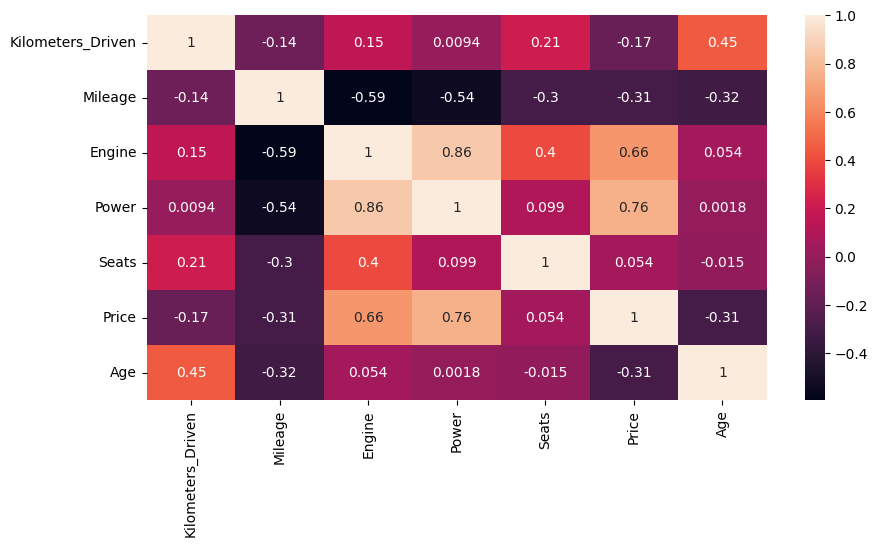

In [201]:
plt.figure(figsize=(10,5))
sbn.heatmap(used_cars_data.corr(numeric_only=True), annot=True)

In [202]:
#Check the data with mileage as 0 as zero mileage does not make much sense.
#We will use the median mileage values by fuel type from the analysis above
used_cars_data.loc[(used_cars_data['Mileage']==0) & (used_cars_data['Fuel_Type']=='Diesel'), 'Mileage']=19.01
used_cars_data.loc[(used_cars_data['Mileage']==0) & (used_cars_data['Fuel_Type']=='Petrol'), 'Mileage']=17.8

In [203]:
#Check for zero mileage values to make sure there are no more
used_cars_data[(used_cars_data['Mileage']==0)]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Age


## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

<font color='blue'>

* There are a total of 7253 observations of used car data. There are missing values for power, engine, mileage, # seats in the original data.
* Majority of the owners (> 80%) are first time. Most cars are based in West and South India with maximum owners based in Mumbai followed by Coimbatore and Hyderabad
* Majority of the cars (>70%) have manual transmission and are diesel or petrol based.
* The target variable 'Price' have maximum empirical correlation w/ Engine and Power with ~ -30% correlation with mileage and age of the car. The same behavior is also exhibited in the scatter plots for price vs predictor variables
* Number of seats have very low correlation with price, hence its not going to be a good predictor for the price of the used car
* Price also has negative correlation with kms driven as expected, but the correlation itself is quite low of ~ -17%
* There is multi-colineraity in the data as engine and power have high correlation of 86%.
*Some of the highest priced brands are Land Rover, Lamborghini, Jaguar, BMW and Mercedes
</font>




## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name.
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y).
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:**

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

Price & price_log are target variables, so they are not part of X
Name has been transformed into Brand, so it can be dropped. We will be using log_kms instead of kms driven, so original column of Kms_Driven can be dropped

In [204]:
#Add Log Kms as one of the columns
used_cars_data['Log_Kms']=np.log(used_cars_data['Kilometers_Driven'])

In [205]:
#Lets check some sample data
used_cars_data.sample(n=5)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Age,Log_Kms
5039,Ahmedabad,99100.0,Petrol,Automatic,Second,9.74,1984.0,208.0,5.0,10.00,audi,10,11.503885
3928,Mumbai,15500.0,Petrol,Manual,First,17.50,1298.0,85.8,5.0,3.75,maruti,7,9.648595
826,Ahmedabad,55000.0,Diesel,Manual,First,22.07,1199.0,73.9,5.0,4.25,volkswagen,6,10.915088
1330,Coimbatore,62946.0,Diesel,Manual,First,15.10,2179.0,140.0,7.0,11.05,mahindra,3,11.050032
4844,Kolkata,37000.0,Petrol,Manual,First,21.50,1197.0,81.8,5.0,2.80,maruti,5,10.518673


In [206]:
#Separate out the predictor variables
X_categorical=used_cars_data[['Age','Brand','Engine','Power','Mileage','Owner_Type','Transmission','Fuel_Type','Log_Kms','Location']]

In [207]:
#Get the target variable
y=np.log(used_cars_data['Price'])

In [208]:
#Convert categorical variables into dummy variables
X=pd.get_dummies(data=X_categorical, drop_first=True,dtype=int)

In [209]:
X

,Age,Engine,Power,Mileage,Log_Kms,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,9,998.0,58.16,26.60,11.184421,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4,1582.0,126.20,19.67,10.621327,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,8,1199.0,88.70,18.20,10.736397,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,7,1248.0,88.76,20.77,11.373663,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,6,1968.0,140.80,15.20,10.613246,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,5,1248.0,74.00,28.40,10.217020,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6015,4,1120.0,71.00,24.40,11.512925,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6016,7,2498.0,112.00,14.00,10.915088,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6017,6,998.0,67.10,18.90,10.736397,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [210]:
#Split data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [211]:
#Check the length of the training and test datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4814, 52), (1204, 52), (4814,), (1204,))

In [212]:
X_train.sample(n=5)

,Age,Engine,Power,Mileage,Log_Kms,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
640,3,1995.0,190.00,18.12,9.886240,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1787,8,1196.0,70.00,15.60,11.082143,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2761,5,1798.0,157.75,13.70,10.545341,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4783,6,1461.0,83.80,19.87,11.102156,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3885,9,1497.0,118.00,17.00,10.232791,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


###Scaling large columns
Engine and Power have larger values than other columns that could impact the results of the regression, so lets scale them


In [214]:
#Scale the predictor/independent/X variables
minmax_scaler= MinMaxScaler()
X_train_scaled=minmax_scaler.fit_transform(X_train)
X_test_scaled=minmax_scaler.transform(X_test)

In [215]:
X_train_scaled

array([[0.14285714, 0.22342221, 0.06620388, ..., 1.        , 0.        ,
        0.        ],
       [0.38095238, 0.319946  , 0.20121719, ..., 0.        , 0.        ,
        0.        ],
       [0.14285714, 0.19844752, 0.07569418, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.52380952, 0.29125886, 0.19760365, ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.35555181, 0.20121719, ..., 0.        , 0.        ,
        0.        ],
       [0.38095238, 0.40870739, 0.12894637, ..., 1.        , 0.        ,
        0.        ]])

In [216]:
#Scale the target variable
minmax_scaler_y= MinMaxScaler()
y_train_scaled=minmax_scaler_y.fit_transform(pd.DataFrame(y_train))
y_test_scaled=minmax_scaler_y.transform(pd.DataFrame(y_test))

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

#### Linear Regression

In [217]:
from sklearn.linear_model import LinearRegression

In [263]:
#Construct a linear regression mode
linear_reg_model =LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [264]:
linear_reg_model.score(X_train_scaled, y_train_scaled)

0.9220382428043512

In [220]:
from statsmodels.regression.linear_model import OLS, OLSResults

In [265]:
linear_reg_model_2= OLS(y_train_scaled, X_train_scaled)

In [266]:
reg_results=linear_reg_model_2.fit()

In [267]:
reg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     1150.
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:29:22   Log-Likelihood:                 8253.3
No. Observations:                4814   AIC:                        -1.641e+04
Df Residuals:                    4764   BIC:                        -1.608e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4685      0.006    -79.524      0.000      -0.480      -0.457
x2             0.5354      0.012     44.175      0.000       0.512       0.559
x3            -0.1450      0.007    -20.865      0.000      -0.159      -0.131
x4            -0.0816      0.010     -8.171      0.000      -0.101      -0.062
x5             0.7320      0.012     61.502      0.000       0.709       0.755
x6             0.7098      0.047     15.151      0.000       0.618       0.802
x7             0.7299      0.012     59.588      0.000       0.706       0.754
x8             0.5707      0.012     46.221      0.000       0.547       0.595
x9             0.5511      0.017     31.509      0.000       0.517       0.585
x10            0.5664      0.015     37.525      0.000       0.537       0.596
x11            0.6543      0.033     19.790      0.000       0.589       0.719
x12            0.6150      0.012     52.569      0.000       0.592       0.638
x13            0.6402      0.012     53.868      0.000       0.617       0.664
x14            0.6260      0.012     53.739      0.000       0.603       0.649
x15            0.5950      0.027     21.674      0.000       0.541       0.649
x16            0.7324      0.014     51.315      0.000       0.704       0.760
x17            0.6534      0.017     39.151      0.000       0.621       0.686
x18            0.7386      0.047     15.807      0.000       0.647       0.830
x19            0.7842      0.013     59.530      0.000       0.758       0.810
x20            0.6132      0.012     53.183      0.000       0.591       0.636
x21            0.6312      0.012     54.404      0.000       0.608       0.654
x22            0.7384      0.012     62.835      0.000       0.715       0.761
x23            0.8104      0.015     54.889      0.000       0.781       0.839
x24            0.6825      0.015     46.191      0.000       0.653       0.711
x25            0.6209      0.013     48.728      0.000       0.596       0.646
x26            0.6963      0.018     38.217      0.000       0.661       0.732
x27            0.6155      0.012     50.563      0.000       0.592       0.639
x28            0.6413      0.012     52.984      0.000       0.618       0.665
const      -2.451e-16   4.18e-17     -5.865      0.000   -3.27e-16   -1.63e-16
x29            0.5374      0.012     45.049      0.000       0.514       0.561
x30            0.6822      0.011     59.381      0.000       0.660       0.705
x31            0.6212      0.012     53.038      0.000       0.598       0.644
x32            0.6912      0.016     43.447      0.000       0.660       0.722
x33            0.0156      0.017      0.933      0.351      -0.017       0.048
x34           -0.0104      0.002     -5.544      0.000      -0.014      -0.007
x35           -0.0234      0.005     -4.934      0.000      -0.033      -0.014
x3

In [229]:
X_train.columns

Index(['Age', 'Engine', 'Power', 'Mileage', 'Log_Kms', 'Brand_audi',
       'Brand_bentley', 'Brand_bmw', 'Brand_chevrolet', 'Brand_datsun',
       'Brand_fiat', 'Brand_force', 'Brand_ford', 'Brand_honda',
       'Brand_hyundai', 'Brand_isuzu', 'Brand_jaguar', 'Brand_jeep',
       'Brand_lamborghini', 'Brand_land', 'Brand_mahindra', 'Brand_maruti',
       'Brand_mercedes-benz', 'Brand_mini', 'Brand_mitsubishi', 'Brand_nissan',
       'Brand_porsche', 'Brand_renault', 'Brand_skoda', 'Brand_smart',
       'Brand_tata', 'Brand_toyota', 'Brand_volkswagen', 'Brand_volvo',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third',
       'Transmission_Manual', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune'],
      dtype='

In [230]:
#Since we observed strong multi-colinearity in the data between engine and power, lets use variation inflation factor to check that
vif_series = pd.Series(
    [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])],
    index = X_train.columns,
    dtype = float)


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [231]:
print(vif_series)

Age                           2.107824
Engine                        9.465208
Power                         7.980394
Mileage                       3.460219
Log_Kms                       1.789949
Brand_audi                   16.271708
Brand_bentley                 1.176143
Brand_bmw                    18.643775
Brand_chevrolet               8.708870
Brand_datsun                  1.896761
Brand_fiat                    2.563704
Brand_force                   1.170484
Brand_ford                   19.679240
Brand_honda                  40.961213
Brand_hyundai                72.528777
Brand_isuzu                   1.240552
Brand_jaguar                  3.370060
Brand_jeep                    1.995951
Brand_lamborghini             1.150746
Brand_land                    4.509532
Brand_mahindra               19.399531
Brand_maruti                 79.408888
Brand_mercedes-benz          21.703103
Brand_mini                    2.625484
Brand_mitsubishi              2.697933
Brand_nissan             

As can be seen in the VIF scores (ignoring categorical variables), Engine and Power show a VIF score >5 indicating multi-colinearity. We will refit the model by removing one of them

In [232]:
#Lets remove column 'Engine' from training and test dataset
X_train.drop(columns=['Engine'], inplace=True)
X_test.drop(columns=['Engine'], inplace=True)


In [233]:
#Rescale the data
X_train_scaled=minmax_scaler.fit_transform(X_train)
X_test_scaled=minmax_scaler.transform(X_test)


In [268]:
#Refit the model
linear_reg_model_3= OLS(y_train_scaled, X_train_scaled)
reg_results_3=linear_reg_model_3.fit()

In [269]:
reg_results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     1150.
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:29:52   Log-Likelihood:                 8253.3
No. Observations:                4814   AIC:                        -1.641e+04
Df Residuals:                    4764   BIC:                        -1.608e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4685      0.006    -79.524      0.000      -0.480      -0.457
x2             0.5354      0.012     44.175      0.000       0.512       0.559
x3            -0.1450      0.007    -20.865      0.000      -0.159      -0.131
x4            -0.0816      0.010     -8.171      0.000      -0.101      -0.062
x5             0.7320      0.012     61.502      0.000       0.709       0.755
x6             0.7098      0.047     15.151      0.000       0.618       0.802
x7             0.7299      0.012     59.588      0.000       0.706       0.754
x8             0.5707      0.012     46.221      0.000       0.547       0.595
x9             0.5511      0.017     31.509      0.000       0.517       0.585
x10            0.5664      0.015     37.525      0.000       0.537       0.596
x11            0.6543      0.033     19.790      0.000       0.589       0.719
x12            0.6150      0.012     52.569      0.000       0.592       0.638
x13            0.6402      0.012     53.868      0.000       0.617       0.664
x14            0.6260      0.012     53.739      0.000       0.603       0.649
x15            0.5950      0.027     21.674      0.000       0.541       0.649
x16            0.7324      0.014     51.315      0.000       0.704       0.760
x17            0.6534      0.017     39.151      0.000       0.621       0.686
x18            0.7386      0.047     15.807      0.000       0.647       0.830
x19            0.7842      0.013     59.530      0.000       0.758       0.810
x20            0.6132      0.012     53.183      0.000       0.591       0.636
x21            0.6312      0.012     54.404      0.000       0.608       0.654
x22            0.7384      0.012     62.835      0.000       0.715       0.761
x23            0.8104      0.015     54.889      0.000       0.781       0.839
x24            0.6825      0.015     46.191      0.000       0.653       0.711
x25            0.6209      0.013     48.728      0.000       0.596       0.646
x26            0.6963      0.018     38.217      0.000       0.661       0.732
x27            0.6155      0.012     50.563      0.000       0.592       0.639
x28            0.6413      0.012     52.984      0.000       0.618       0.665
const      -2.451e-16   4.18e-17     -5.865      0.000   -3.27e-16   -1.63e-16
x29            0.5374      0.012     45.049      0.000       0.514       0.561
x30            0.6822      0.011     59.381      0.000       0.660       0.705
x31            0.6212      0.012     53.038      0.000       0.598       0.644
x32            0.6912      0.016     43.447      0.000       0.660       0.722
x33            0.0156      0.017      0.933      0.351      -0.017       0.048
x34           -0.0104      0.002     -5.544      0.000      -0.014      -0.007
x35           -0.0234      0.005     -4.934      0.000      -0.033      -0.014
x3

In [270]:
reg_results_3.mse_resid

0.001918292201165613

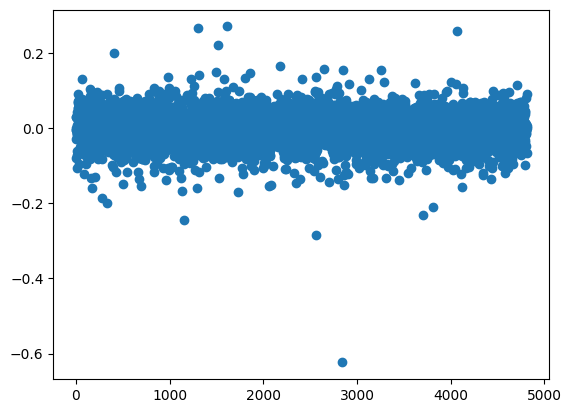

In [271]:
# Lets check the plot of residuals to make sure it satisfies OLS assumptions
plt.scatter(y=reg_results.resid, x= np.arange(0, len(X_train_scaled)))

As can be seen from the residuals plot, residuals are averaged around zero as well have a constant variance, no heteroskedacity

In [276]:
# Model performance on the test data
y_test_predict=linear_reg_model_3.predict(reg_results_3.params, X_test_scaled)

In [277]:
linear_reg_model_3.k_constant

1

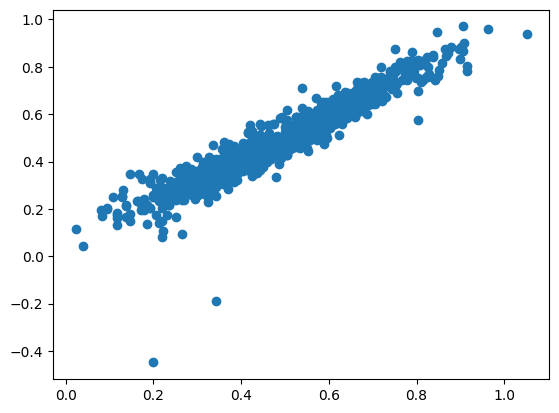

In [278]:
plt.scatter(y=np.array(y_test_predict), x=np.array(y_test_scaled))

In [279]:
#Calculate MSE for the test data
np.sqrt(np.sum([(y_test_scaled[i]-y_test_predict[i])**2 for i in np.arange(0, len(y_test_scaled))])/(len(y_test_scaled)-1))

0.05046852098076633

### **Hyperparameter Tuning: Decision Tree**

**Feature Importance**

### **Hyperparameter Tuning: Random Forest**

**Feature Importance**

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?